# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

## Imports

In [3]:
import os
import librosa as lr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd

In [4]:
label_genre = pd.read_csv('labels_new.csv')

label_genre.head()

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


In [5]:
#make a list object of unique genres in labels dataframe
genres = list(label_genre['genre'].unique())
genres


['metal',
 'country',
 'hiphop',
 'reggae',
 'classical',
 'jazz',
 'rock',
 'pop',
 'blues',
 'disco']

# Feature engineering

In [6]:
from pathlib import Path
import os

In [7]:
os.listdir('labeled')

['m00002.wav',
 'm00039.wav',
 'm00041.wav',
 'm00072.wav',
 'm00096.wav',
 'm00102.wav',
 'm00112.wav',
 'm00138.wav',
 'm00192.wav',
 'm00206.wav',
 'm00230.wav',
 'm00236.wav',
 'm00248.wav',
 'm00253.wav',
 'm00298.wav',
 'm00313.wav',
 'm00338.wav',
 'm00339.wav',
 'm00351.wav',
 'm00400.wav',
 'm00421.wav',
 'm00429.wav',
 'm00435.wav',
 'm00454.wav',
 'm00477.wav',
 'm00501.wav',
 'm00503.wav',
 'm00513.wav',
 'm00553.wav',
 'm00606.wav',
 'm00623.wav',
 'm00627.wav',
 'm00629.wav',
 'm00633.wav',
 'm00637.wav',
 'm00658.wav',
 'm00671.wav',
 'm00676.wav',
 'm00677.wav',
 'm00678.wav',
 'm00716.wav',
 'm00762.wav',
 'm00772.wav',
 'm00773.wav',
 'm00801.wav',
 'm00821.wav',
 'm00850.wav',
 'm00867.wav',
 'm00895.wav',
 'm00996.wav']

In [8]:
# Define the base directory where the subdirectories "cat" and "dog" are located
base_dir = "labeled"  # Replace with your directory path

# Initialize lists for audio data and labels
audio_data = []
sample_freqs = []
labels = []

# Target length for 5 seconds at a sample rate of 22050 Hz (adjust if different)
target_length = 5 * 22050

# Process each audio file
for label in label_genre['filename']:
    sub_dir = os.path.join(base_dir)
    for file in os.listdir(sub_dir):
        if file.endswith(".wav"):
            file_path = os.path.join(sub_dir, file)
            data, sfreq = lr.load(file_path, sr=None)  # Keep original sample rate

            # Truncate or pad the audio
            if len(data) > target_length:
                # Truncate the data
                data = data[:target_length]
            elif len(data) < target_length:
                # Pad with zeros
                padding = target_length - len(data)
                data = np.pad(data, (0, padding), mode='constant')

            # Append the processed data and label
            audio_data.append(data)
            sample_freqs.append(sfreq)
            labels.append(label)

audio_data = np.stack(audio_data, axis=0)
sample_freqs = np.array(sample_freqs)
labels = np.array(labels)

In [9]:
print(audio_data[:5], labels[:5])

[[-0.01635742 -0.02282715 -0.01467896 ...  0.00747681  0.00817871
   0.00772095]
 [-0.0947876  -0.15338135 -0.1439209  ... -0.18804932 -0.09313965
  -0.0645752 ]
 [ 0.07803345 -0.03765869  0.12664795 ...  0.06295776  0.0484314
   0.02236938]
 [ 0.1060791   0.08496094  0.06210327 ...  0.27041626  0.321167
   0.26272583]
 [-0.03607178 -0.10568237 -0.20123291 ... -0.05239868 -0.0506897
  -0.05014038]] ['m00248.wav' 'm00248.wav' 'm00248.wav' 'm00248.wav' 'm00248.wav']


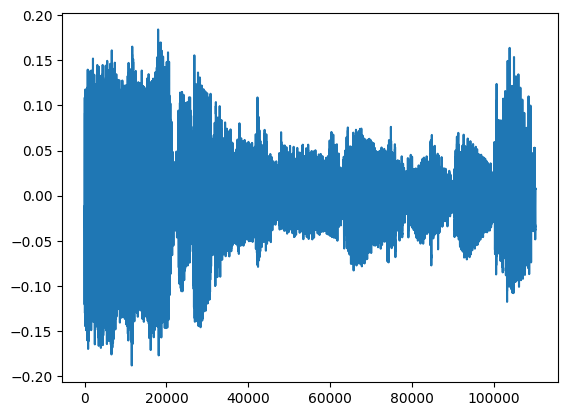

In [10]:
plt.plot(audio_data[0])

In [11]:
# Pick a random audio clip
random_index = np.random.choice(len(audio_data), size=1, replace=False)
clip = audio_data[random_index][0]
sfreq = sample_freqs[random_index][0]
label = labels[random_index][0]

print(f"Label {label}")

# Play the clip
Audio(data=clip, rate=sfreq)

Label m00400.wav


In [12]:
print(label_genre['genre'].value_counts())

genre
metal        5
country      5
hiphop       5
reggae       5
classical    5
jazz         5
rock         5
pop          5
blues        5
disco        5
Name: count, dtype: int64


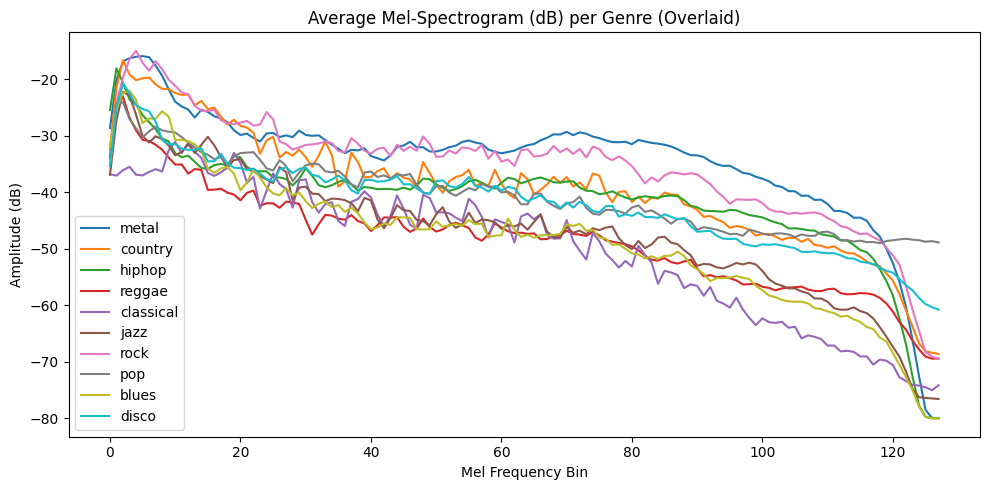

In [18]:
import librosa
import librosa.display

# Path to the folder with .wav files
base_dir = "labeled"  # e.g., "C:/path/to/Opdracht_3/labeled"

genres = label_genre['genre'].unique()
plt.figure(figsize=(10, 5))

for genre in genres:
    # Get all filenames for this genre
    files_in_genre = label_genre[label_genre['genre'] == genre]['filename']
    
    # Store each file's mean (over time) 
    genre_spectra = []
    
    for fn in files_in_genre:
        full_path = os.path.join(base_dir, fn)
        audio, sr = librosa.load(full_path, sr=None)
        
        # Compute Mel-spectrogram, then convert to dB
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_db = librosa.power_to_db(S, ref=np.max)
        
        # Average over time: shape = (n_mels, n_frames) -> mean over axis=1 -> (n_mels,)
        S_db_mean = np.mean(S_db, axis=1)
        
        genre_spectra.append(S_db_mean)
    
    # Convert list to array: shape = (num_files_in_genre, n_mels)
    genre_spectra = np.array(genre_spectra)
    
    # Average across all files in this genre
    mean_spectrum = np.mean(genre_spectra, axis=0)
    plt.plot(mean_spectrum, label=genre)

plt.title("Average Mel-Spectrogram (dB) per Genre (Overlaid)")
plt.xlabel("Mel Frequency Bin")
plt.ylabel("Amplitude (dB)")
plt.legend()
plt.tight_layout()
plt.show()

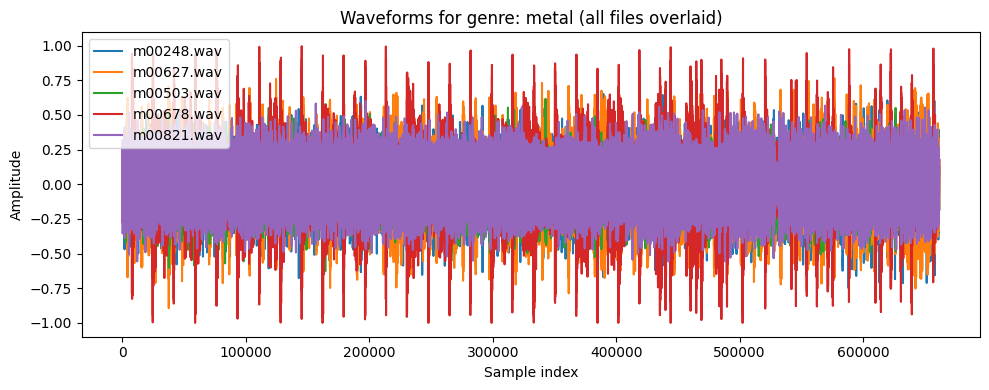

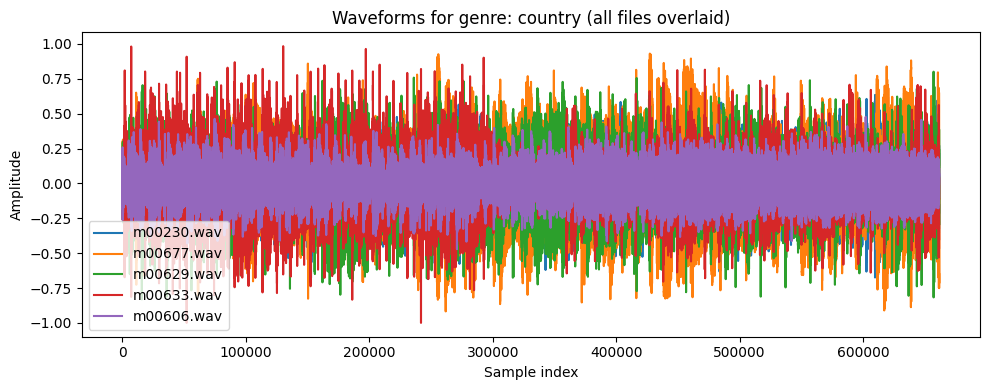

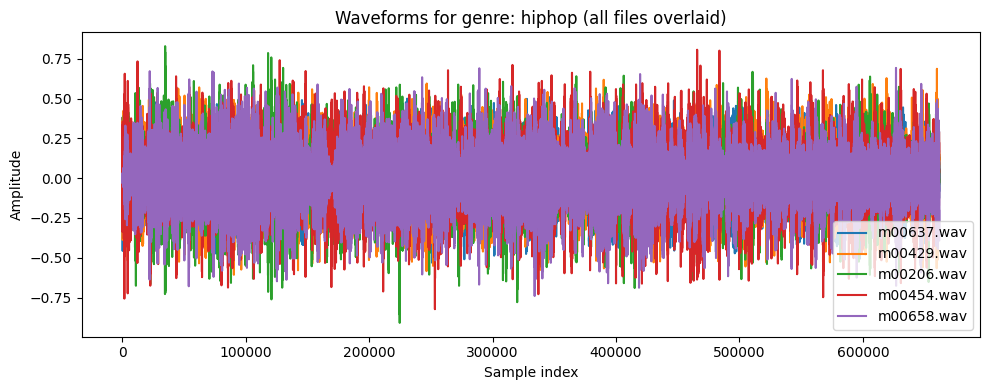

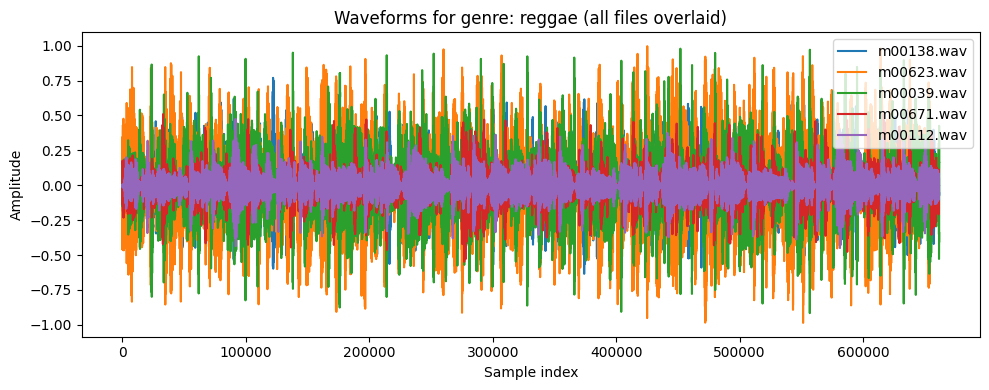

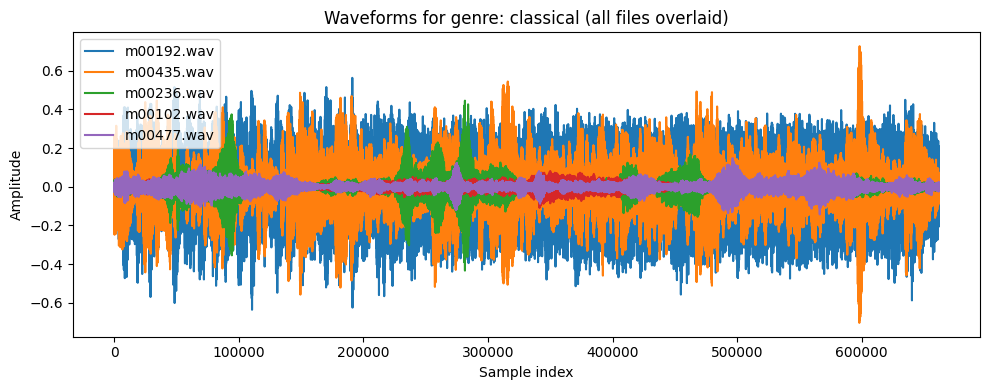

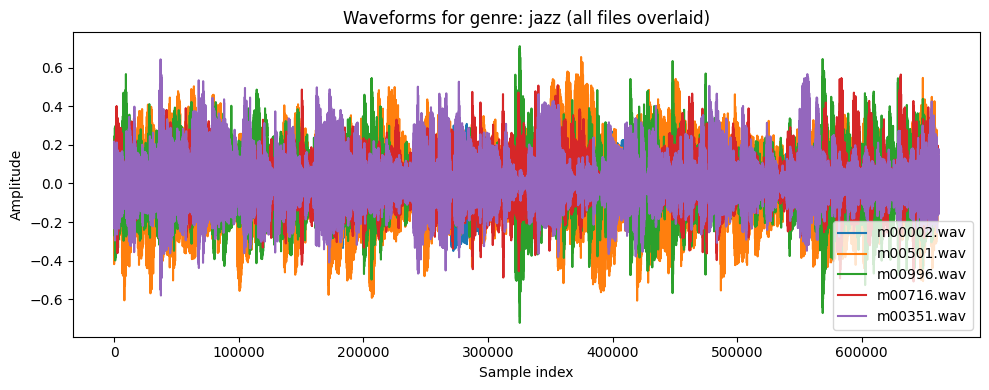

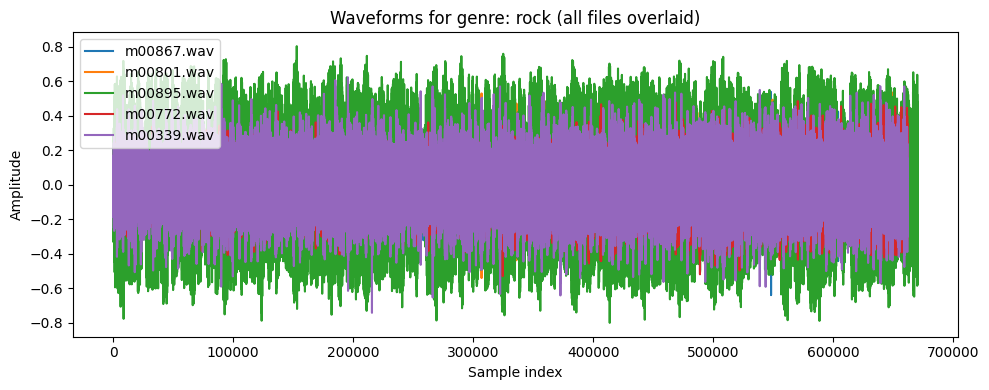

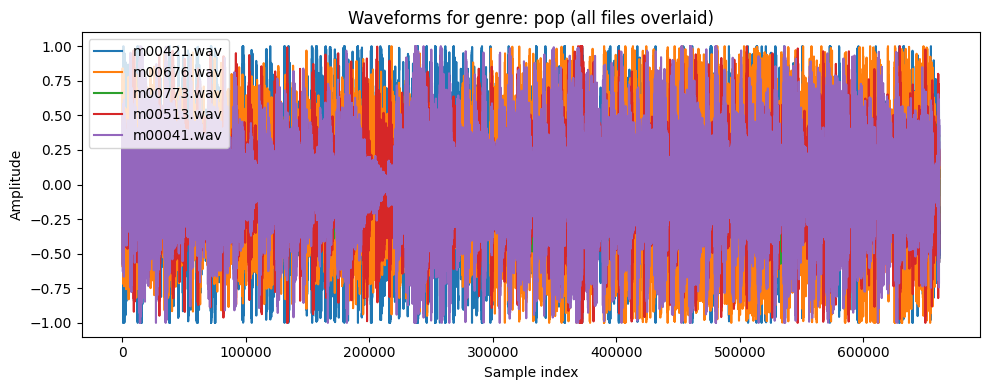

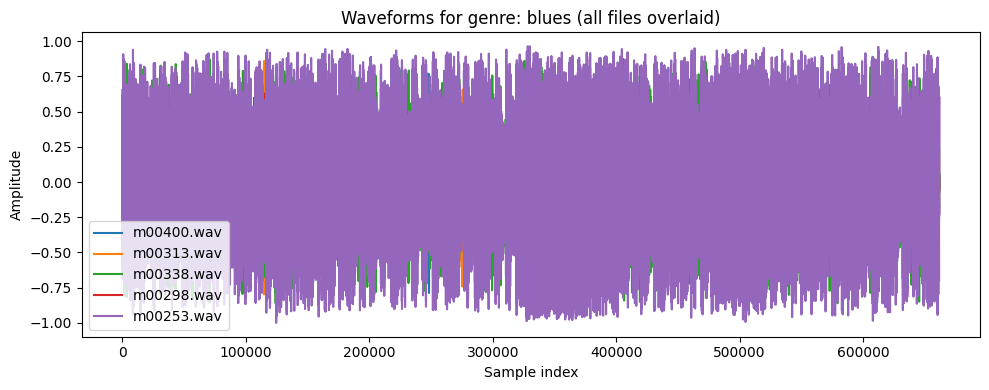

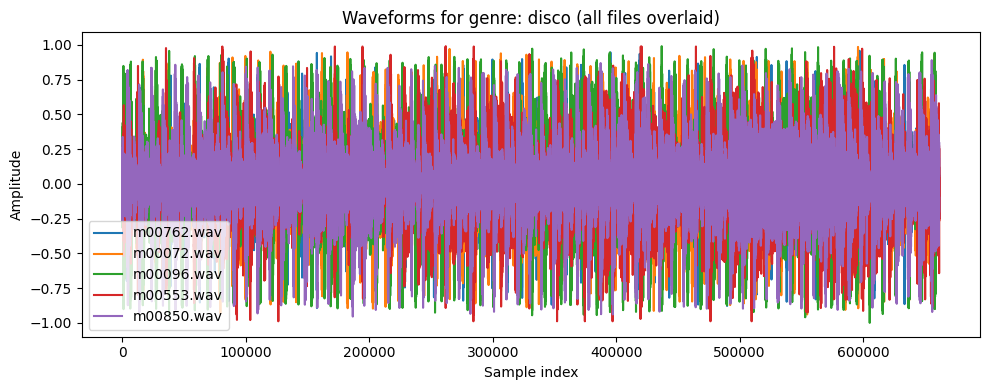

In [20]:
for genre in genres:
    # Create a new figure for each genre
    plt.figure(figsize=(10, 4))
    
    # Get the .wav filenames belonging to this genre
    files_in_genre = label_genre[label_genre['genre'] == genre]['filename']
    
    for fn in files_in_genre:
        # Build the path to the .wav file
        full_path = os.path.join(base_dir, fn)
        
        # Load the audio
        audio, sr = librosa.load(full_path, sr=None)
        
        # Plot the waveform
        # 'label=fn' lets you see which line corresponds to which file
        plt.plot(audio, label=fn)
    
    plt.title(f"Waveforms for genre: {genre} (all files overlaid)")
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()

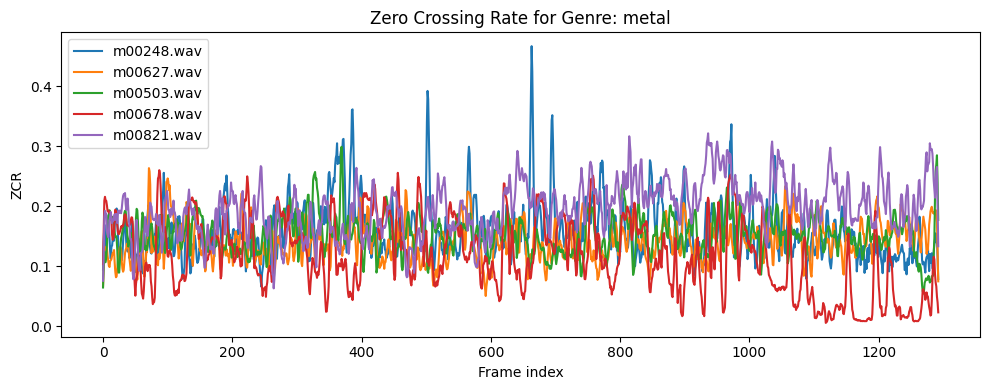

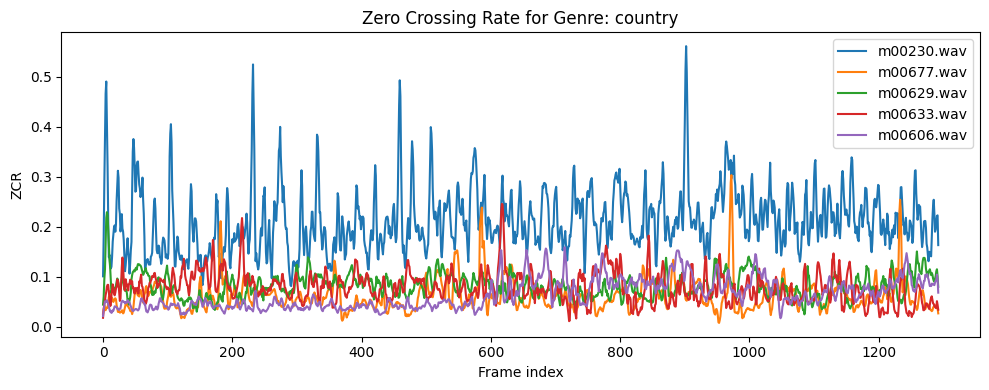

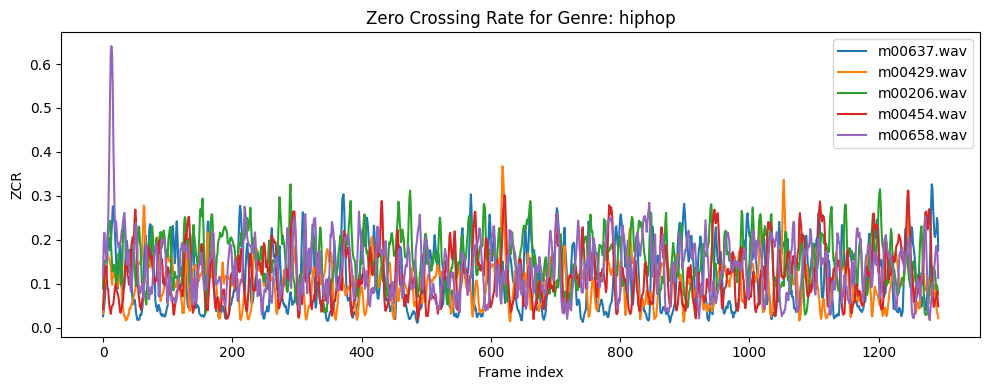

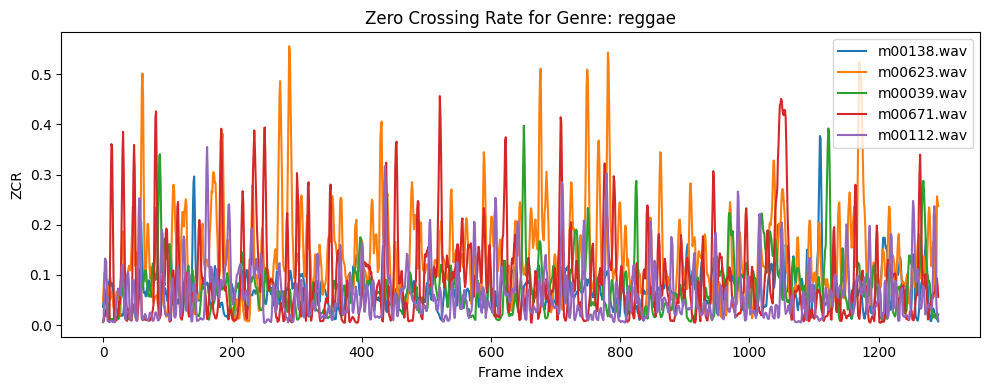

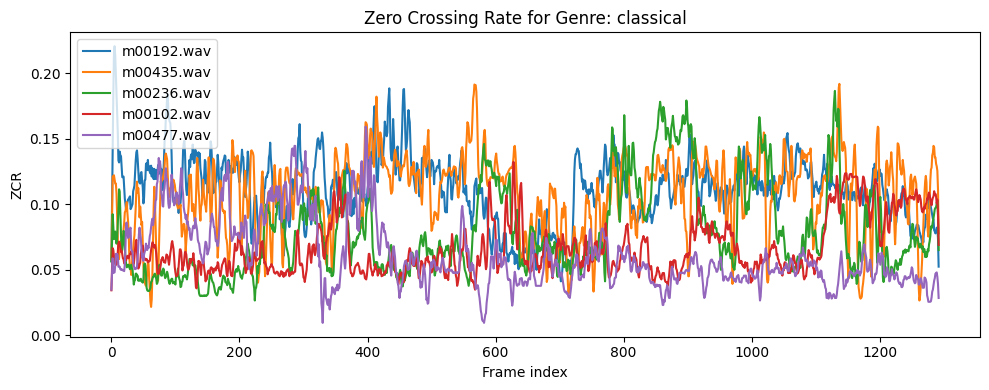

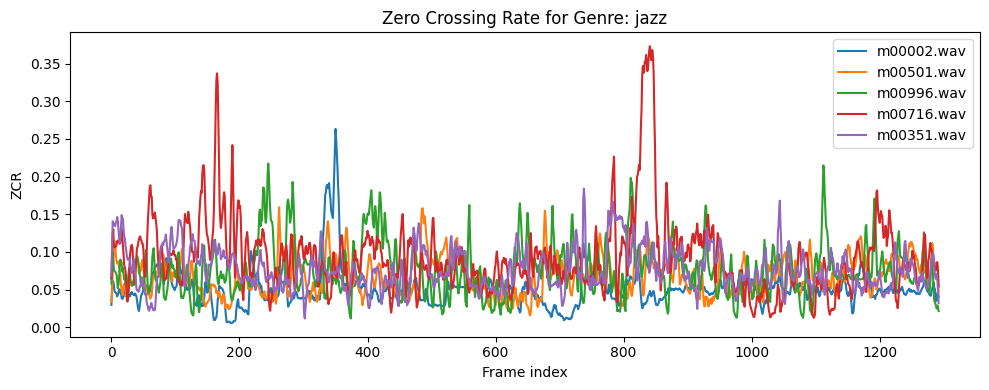

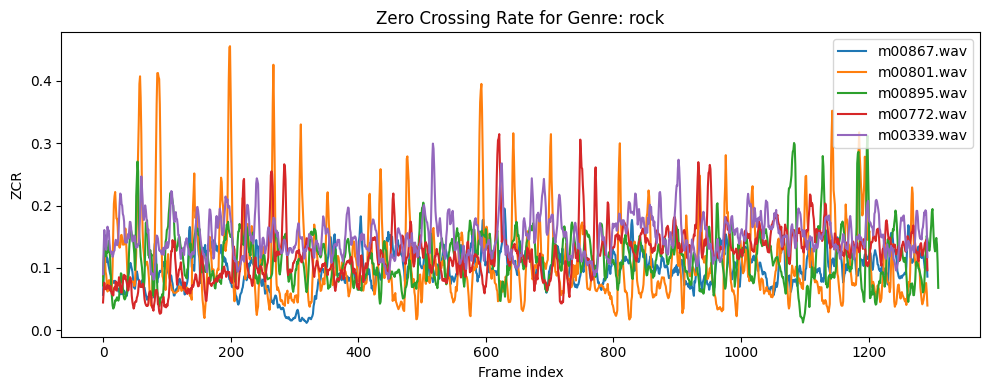

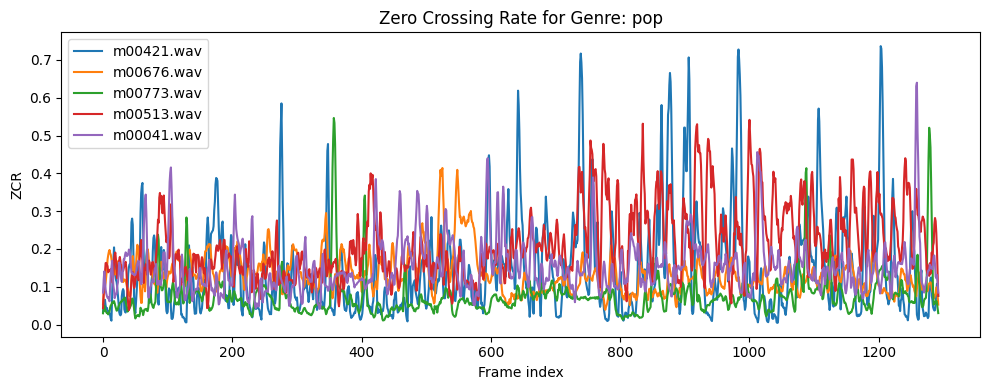

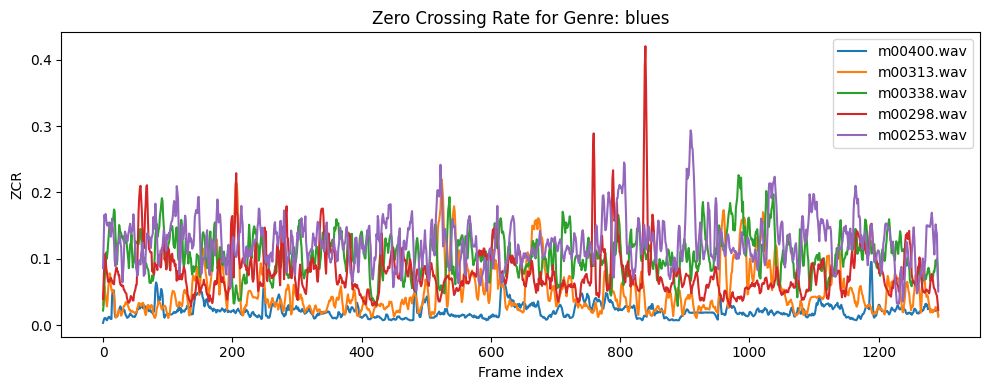

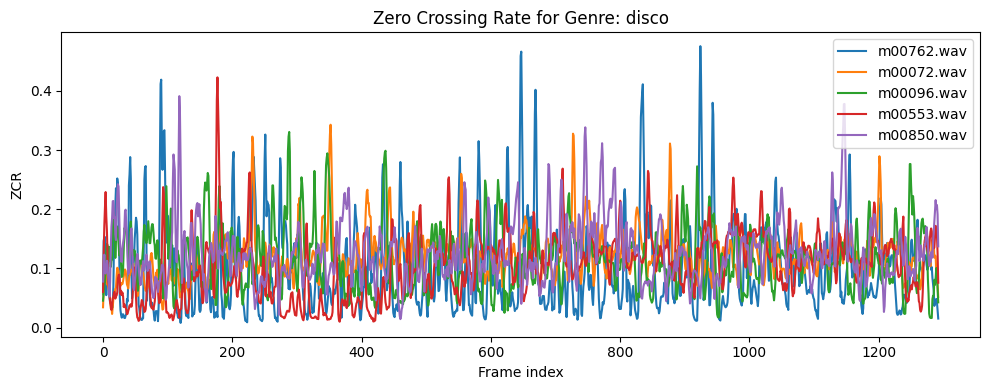

In [21]:
for genre in genres:
    plt.figure(figsize=(10, 4))
    files_in_genre = label_genre[label_genre['genre'] == genre]['filename']
    
    for fn in files_in_genre:
        full_path = os.path.join(base_dir, fn)
        
        audio, sr = librosa.load(full_path, sr=None)
        
        # Compute the zero crossing rate (shape: (1, n_frames))
        zcr = librosa.feature.zero_crossing_rate(audio)
        
        zcr = zcr[0]
        
        # Plot the ZCR curve for this file
        plt.plot(zcr, label=fn)
    
    plt.title(f"Zero Crossing Rate for Genre: {genre}")
    plt.xlabel("Frame index")
    plt.ylabel("ZCR")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Unsupervised Learning